In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
import math as math
import datetime as datetime

2024-02-16 12:35:18.509128: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-16 12:35:21.118670: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-16 12:35:21.118767: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-16 12:35:21.511700: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-16 12:35:22.352186: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-16 12:35:22.355435: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
from sklearn.model_selection import train_test_split

test_split = 0.2
# Load the data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

print(train.shape)
print(test.shape)

# Split the data into X and y
X = train.iloc[:, 1:785]
y = train.iloc[:, 0]
X_test = test.iloc[:, 0:784]

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2, random_state = 1212)

x_train_re = X_train.to_numpy().reshape(33600, 28, 28) # reshape to 28x28 images and 80% of the data
y_train_re = y_train.values
x_validation_re = X_validation.to_numpy().reshape(8400, 28, 28) # reshape to 28x28 images and 20% of the data
y_validation_re = y_validation.values
x_test_re = test.to_numpy().reshape(28000, 28, 28)  # reshape to 28x28 images all test data

x_train_chan = x_train_re.reshape(x_train_re.shape[0], 28, 28, 1) # add color channel
x_validation_chan = x_validation_re.reshape(x_validation_re.shape[0], 28, 28, 1) # add color channel
x_test_chan = x_test_re.reshape(x_test_re.shape[0], 28, 28, 1) # add color channel

x_train_norm = x_train_chan / 255.0 # normalize the data
x_validation_norm = x_validation_chan / 255.0 # normalize the data
x_test_norm = x_test_chan / 255.0 # normalize the data

(42000, 785)
(28000, 784)


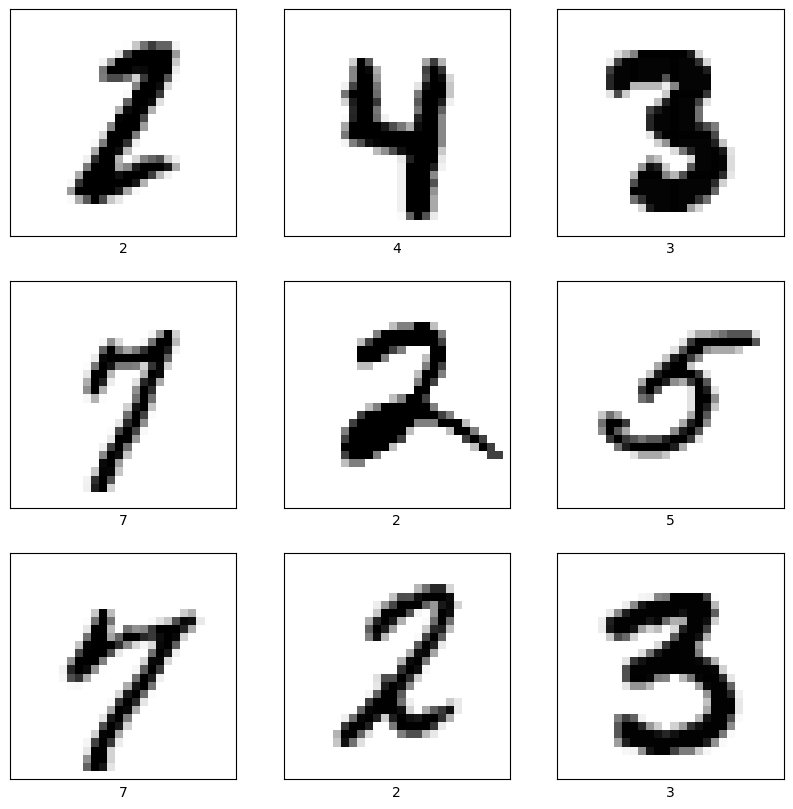

In [3]:
# Print some training examples
numbers_to_display = 9
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_re[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_re[i])
plt.show()

In [27]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=96, activation=tf.keras.activations.relu),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax)
])

# Desctipe the model
model.summary()

# Show model plotted
# tf.keras.utils.plot_model(
#     model,
#     show_shapes=True,
#     show_layer_names=True,
# )

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 5408)              0         
                                                                 
 dense_16 (Dense)            (None, 96)                519264    
                                                                 
 dropout_8 (Dropout)         (None, 96)                0         
                                                                 
 dense_17 (Dense)            (None, 10)                970       
                                                      

In [29]:
# Compile the model with adam
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [30]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_norm,
    y_train_re,
    epochs=10,
    validation_data=(x_validation_norm, y_validation_re),
    callbacks=[tensorboard_callback]
)
print("The model has successfully trained")

Epoch 1/10
1050/1050 [==============================] - 12s 11ms/step - loss: 0.4331 - accuracy: 0.8783 - val_loss: 0.2032 - val_accuracy: 0.9531
Epoch 2/10
1050/1050 [==============================] - 11s 10ms/step - loss: 0.3774 - accuracy: 0.9072 - val_loss: 0.2254 - val_accuracy: 0.9437
Epoch 3/10
1050/1050 [==============================] - 11s 10ms/step - loss: 0.3650 - accuracy: 0.9136 - val_loss: 0.3093 - val_accuracy: 0.9365
Epoch 4/10
1050/1050 [==============================] - 11s 10ms/step - loss: 0.3516 - accuracy: 0.9217 - val_loss: 0.2719 - val_accuracy: 0.9487
Epoch 5/10
1050/1050 [==============================] - 11s 10ms/step - loss: 0.3518 - accuracy: 0.9231 - val_loss: 0.2440 - val_accuracy: 0.9587
Epoch 6/10
1050/1050 [==============================] - 11s 11ms/step - loss: 0.3738 - accuracy: 0.9223 - val_loss: 0.3375 - val_accuracy: 0.9367
Epoch 7/10
1050/1050 [==============================] - 11s 11ms/step - loss: 0.4129 - accuracy: 0.9159 - val_loss: 0.3194 -

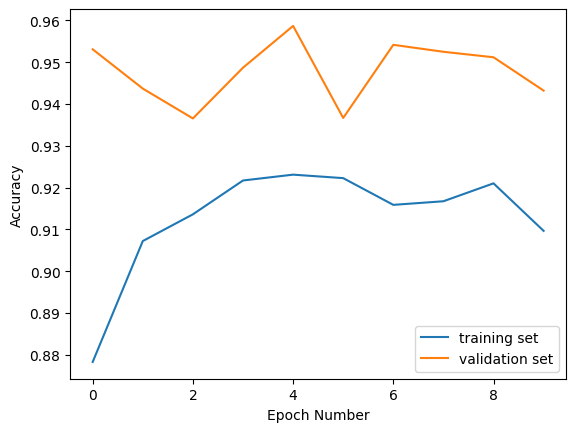

In [32]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()